In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split

from pca import apply_pca

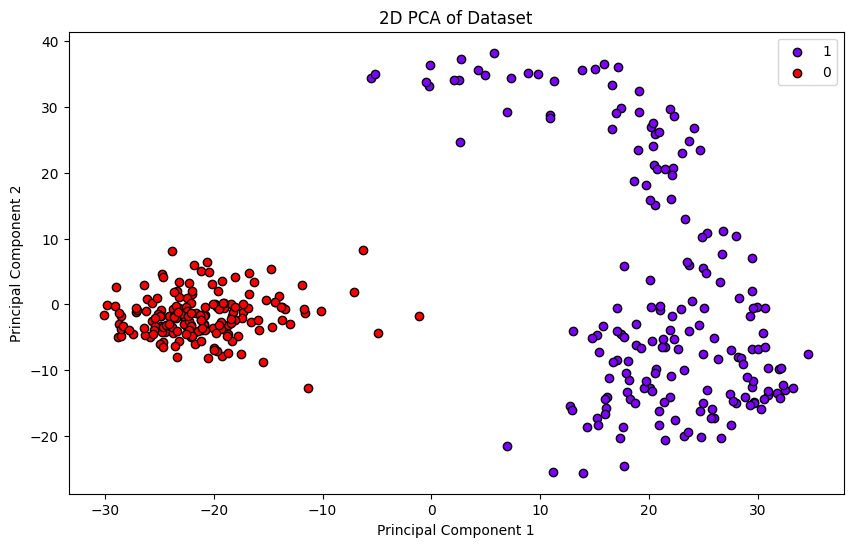

In [2]:
data = load_digits()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# verify if it is a binary classification problem
unique_classes = np.unique(df['target'])
if unique_classes.size > 2:
    # randomly select 2 classes
    selected_classes = np.random.choice(unique_classes, 2, replace=False)

    filtered_df = df[df['target'].isin(selected_classes)]

if df.shape[1] > 3: # 3 because of target
    # Extract data and labels from the filtered dataframe
    X_filtered = filtered_df.drop('target', axis=1).values
    y_filtered = filtered_df['target'].values

    # Apply PCA and visualize the result
    reduced_data = apply_pca(X_filtered, y_filtered, target_names=selected_classes)


In [3]:
reduced_df = pd.DataFrame(reduced_data, columns=['x', 'y'])
reduced_df['target'] = y_filtered

X1 = reduced_df[reduced_df['target'] == selected_classes[0]][['x', 'y']]
X2 = reduced_df[reduced_df['target'] == selected_classes[1]][['x', 'y']]

In [6]:
reduced_df[['x', 'y']]

,x,y
0,-24.846153,-0.893582
1,30.663104,-0.593848
2,-17.334607,-1.158441
3,24.117035,26.742044
4,-19.653309,2.011222
...,...,...
355,23.238747,-9.993272
356,17.071883,-3.995761
357,-11.302492,-12.700389
358,17.694380,-4.986477
